In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')


from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, OneHotEncoder
le = LabelEncoder()
oe = OneHotEncoder()
scaler = MinMaxScaler()
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor



data_path = r'C:\\Users\\Sunil\\Projects\\Machine Hack\\Wipro\\Data\\'

In [3]:
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
sample_sub = pd.read_csv(data_path + 'sample_submission.csv')

In [4]:
train.loc[ (train['Fill Flag'] == 0) | (train['Fill Flag'] > 5), 'Fill Flag'] = 0
test.loc[ (test['Fill Flag'] == 0) | (test['Fill Flag'] > 5), 'Fill Flag'] = 0

In [5]:
df = pd.concat([train, test], axis = 0).reset_index(drop=True)

In [6]:
df.shape

(192816, 18)

In [7]:
# Encoding
df = pd.get_dummies(columns=['Cloud Type', 'Fill Flag'], data = df)

In [8]:
train_proc, test_proc = df[:train.shape[0]], df[train.shape[0]:].reset_index(drop = True)

targets = ['Clearsky DHI', 'Clearsky GHI', 'Clearsky DNI']
features = [col for col in df.columns if col not in targets]

In [705]:
targets = ['Clearsky DHI', 'Clearsky GHI', 'Clearsky DNI']
features = [col for col in df.columns if col not in targets]

total_error = 0
for i in targets:
    target = i
    trn, val = train_test_split(train_proc, test_size = 0.2, random_state = 42)

    ##### Input for model
    X_trn, X_val = trn[features], val[features]

    ##### Target column
    y_trn, y_val = trn[target], val[target]

    ##### Features for test data that we will be predicting
    X_test = test_proc[features]
    
    
    model = CatBoostRegressor(random_state=1999, n_estimators=1000, task_type = 'GPU', eval_metric='RMSE')

#     model = RandomForestRegressor(random_state=1999, n_estimators=500, n_jobs=-1)
    
    model.fit(X_trn, y_trn, eval_set=[(X_val, y_val)], verbose = 200, early_stopping_rounds=100)
    preds = model.predict(X_val)

    error = mean_squared_error(y_val, preds)
    
    test_preds = model.predict(X_test)
    sample_sub[target] = test_preds
    test[target] = test_preds
    
    print(f'Target is {target} and mean_squared_error is : {error}')
    
    total_error += error

print(f"Total error is {total_error/3}")

Learning rate set to 0.105919
0:	learn: 58.0409185	test: 58.0700287	best: 58.0700287 (0)	total: 10.5ms	remaining: 10.5s
200:	learn: 13.4844799	test: 13.6991834	best: 13.6991834 (200)	total: 1.76s	remaining: 7.01s
400:	learn: 12.2317085	test: 12.7242509	best: 12.7242509 (400)	total: 3.51s	remaining: 5.25s
600:	learn: 11.3712388	test: 12.0544939	best: 12.0544939 (600)	total: 5.41s	remaining: 3.59s
800:	learn: 10.7495563	test: 11.5820654	best: 11.5820654 (800)	total: 7.21s	remaining: 1.79s
999:	learn: 10.2373443	test: 11.1869823	best: 11.1869823 (999)	total: 8.98s	remaining: 0us
bestTest = 11.18698234
bestIteration = 999
Target is Clearsky DHI and mean_squared_error is : 125.14857706795776
Learning rate set to 0.105919
0:	learn: 293.5200289	test: 293.7300669	best: 293.7300669 (0)	total: 10.5ms	remaining: 10.5s
200:	learn: 6.6079293	test: 6.7086416	best: 6.7086416 (200)	total: 1.83s	remaining: 7.26s
400:	learn: 6.0371197	test: 6.2276314	best: 6.2276314 (400)	total: 3.69s	remaining: 5.5s
60

In [706]:
# n = [1, 2, 3, 4, 5, 6, 7, 8, 9]
# test['is_0_hour'] = test['Hour'].apply(lambda x: 1 if x in n else 0)
# index = test[ test['is_0_hour'] == 1].index

# sample_sub.loc[index, 'Clearsky DHI'] = 0
# sample_sub.loc[index, 'Clearsky DNI'] = 0
# sample_sub.loc[index, 'Clearsky GHI'] = 0

# sample_sub.loc[ sample_sub['Clearsky DHI'] < 1, 'Clearsky DHI'] = 0
# sample_sub.loc[ sample_sub['Clearsky DNI'] < 1, 'Clearsky DNI'] = 0
# sample_sub.loc[ sample_sub['Clearsky GHI'] < 1, 'Clearsky GHI'] = 0

In [707]:
sample_sub.to_csv(data_path + "Baseline_CAT_USing_DHI_and_GHI_as_Features.csv", index = False)

In [722]:
635+125+31

791

In [723]:
791/3

263.6666666666667

---
# Feature Engineering

In [708]:
train = pd.read_csv(data_path + 'train.csv')
test = pd.read_csv(data_path + 'test.csv')
# sample_sub = pd.read_csv(data_path + 'sample_submission.csv')

In [709]:
train.loc[ (train['Fill Flag'] == 0) | (train['Fill Flag'] > 5), 'Fill Flag'] = 0
test.loc[ (test['Fill Flag'] == 0) | (test['Fill Flag'] > 5), 'Fill Flag'] = 0

In [710]:
int8_cols = ['Month', 'Day', 'Hour', 'Minute', 'Cloud Type', 'Fill Flag']
int16_cols = ['Year', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI', 'Pressure']
test_int16_cols = ['Year', 'Pressure']


train[int8_cols] = train[int8_cols].astype('int8')
train[int16_cols] = train[int16_cols].astype('int16')

test[int8_cols] = test[int8_cols].astype('int8')
test[test_int16_cols] = test[test_int16_cols].astype('int16')

In [711]:
def join(train_, test_):
    df_ = pd.concat([train_, test_], axis = 0).reset_index(drop=True)
    return df_

def split(df_):
    train_, test_ = df_[:train.shape[0]], df_[train.shape[0]:].reset_index(drop = True)
    targets = ['Clearsky DHI', 'Clearsky GHI', 'Clearsky DNI', 'Date']
    features_ = [col for col in df_.columns if col not in targets]
    
    return train_, test_, features_

---
#### Creating more date features

In [712]:
df = join(train, test)

df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df['Week'] = df['Date'].dt.week
df['Quarter'] = df['Date'].dt.quarter #805
df['day_of_week'] = df['Date'].dt.dayofweek # 773


train_proc, test_proc, features = split(df)

---
#### Zenith Angle Magic

In [713]:
distance = [0.9840, 0.9888, 0.9962, 1.005, 1.0122, 1.0163, 1.0161, 1.0116, 1.0039, 0.9954, 0.9878, 0.9837]
month = [i for i in range(1, 13)]

md_dict = dict(zip(month, distance))

In [714]:
df = join(train_proc, test_proc)

#########
df['Vertical_distance'] = df.apply(lambda x: (md_dict[x['Month']] * np.cos(x['Solar Zenith Angle'])), axis = 1) # 771

##########
train_proc, test_proc, features = split(df)

In [715]:
#### Binning

df = join(train_proc, test_proc)

df['Hour Bins'] = pd.cut(df["Hour"], bins=3, labels=False) #770

train_proc, test_proc, features = split(df)

---
#### Aggregation

In [716]:
df = join(train_proc, test_proc)

df['Day_Wise_DNI_Mean'] = df.groupby(['Day'])['Clearsky DNI'].transform('mean') #765
df['Week_Wise_DNI_Mean'] = df.groupby(['Week'])['Clearsky DNI'].transform('mean') #743
df['Hour_Wise_DNI_Mean'] = df.groupby(['Hour'])['Clearsky DNI'].transform('mean') #736.0352904883216

df['Day_Wise_DNI_STD'] = df.groupby(['Day'])['Clearsky DNI'].transform('std') #728
df['Week_Wise_DNI_STD'] = df.groupby(['Week'])['Clearsky DNI'].transform('std') #718

df['Day_Wise_DNI_Median'] = df.groupby(['Day'])['Clearsky DNI'].transform('median') #714
df['Week_Wise_DNI_Median'] = df.groupby(['Week'])['Clearsky DNI'].transform('median') #701



df['Hour_Minute_Wise_DNI_Mean'] = df.groupby(['Week', 'Day', 'Hour'])['Clearsky DNI'].transform('mean') #639
df['Hour_Minute_Wise_DNI_STD'] = df.groupby(['Week', 'Day', 'Hour'])['Clearsky DNI'].transform('std') #635



train_proc, test_proc, features = split(df)

In [719]:
%%time
total_error = 0
for i in ['Clearsky DNI']:
    target = i
    trn, val = train_test_split(train_proc, test_size = 0.2, random_state = 42)

    ##### Input for model
    X_trn, X_val = trn[features], val[features]

    ##### Target column
    y_trn, y_val = trn[target], val[target]

    ##### Features for test data that we will be predicting
    X_test = test_proc[features]
    
    
    model = CatBoostRegressor(random_state=1999, n_estimators=1000, task_type = 'GPU', eval_metric='RMSE')
#     model = LGBMRegressor(random_state=1999, n_estimators=1000, eval_metric='RMSE')
#     model = XGBRegressor(random_state=1999, n_estimators=1000, tree_method = 'gpu_hist', gpu_id=0)
    
    model.fit(X_trn, y_trn, eval_set=[(X_val, y_val)], verbose = 200, early_stopping_rounds=100)
    preds = model.predict(X_val)

    error = mean_squared_error(y_val, preds)
    
    print(f'Target is {target} and mean_squared_error is : {error}')
    
    test_preds = model.predict(X_test)
    sample_sub[target] = test_preds
    test[target] = test_preds

Learning rate set to 0.105919
0:	learn: 332.0119459	test: 332.2439450	best: 332.2439450 (0)	total: 12.1ms	remaining: 12.1s
200:	learn: 31.0283912	test: 31.4882787	best: 31.4882787 (200)	total: 1.88s	remaining: 7.47s
400:	learn: 27.9040266	test: 28.8922058	best: 28.8922058 (400)	total: 3.65s	remaining: 5.46s
600:	learn: 25.8680982	test: 27.2772836	best: 27.2772836 (600)	total: 5.44s	remaining: 3.61s
800:	learn: 24.3437745	test: 26.1137066	best: 26.1137066 (800)	total: 7.23s	remaining: 1.8s
999:	learn: 23.1254354	test: 25.2086377	best: 25.2086377 (999)	total: 9s	remaining: 0us
bestTest = 25.20863768
bestIteration = 999
Target is Clearsky DNI and mean_squared_error is : 635.4752946702611
CPU times: total: 15.8 s
Wall time: 9.58 s


In [663]:
dict(zip(features, model.feature_importances_))

{'Year': 3.0730556089975805,
 'Month': 0.4020216097428976,
 'Day': 0.7102747887389177,
 'Hour': 1.0528424565177585,
 'Minute': 0.9127008684861527,
 'Cloud Type': 1.3668271625987223,
 'Dew Point': 2.7629567115610545,
 'Temperature': 0.995741763614101,
 'Pressure': 0.3779721716657252,
 'Relative Humidity': 1.8370970374821698,
 'Solar Zenith Angle': 38.19735526208581,
 'Precipitable Water': 11.006240057353597,
 'Wind Direction': 0.9642796554032849,
 'Wind Speed': 0.7465648027112167,
 'Fill Flag': 0.041328436051834436,
 'Week': 1.2262699367046448,
 'Quarter': 0.008712931915254081,
 'day_of_week': 0.6193244379484135,
 'Vertical_distance': 0.0726582873442144,
 'Hour Bins': 0.04578184354326443,
 'Day_Wise_DNI_Mean': 0.3115930391747442,
 'Week_Wise_DNI_Mean': 0.723994429119071,
 'Hour_Wise_DNI_Mean': 7.457771881303977,
 'Day_Wise_DNI_STD': 0.25492165194925304,
 'Week_Wise_DNI_STD': 1.1274320678624645,
 'Day_Wise_DNI_Median': 0.015802474373511566,
 'Week_Wise_DNI_Median': 0.742034235119733,
 'H

In [721]:
sample_sub.to_csv(data_path + "Baseline_CAT_Using_features_for_only_DNI.csv", index = False)

<AxesSubplot:>

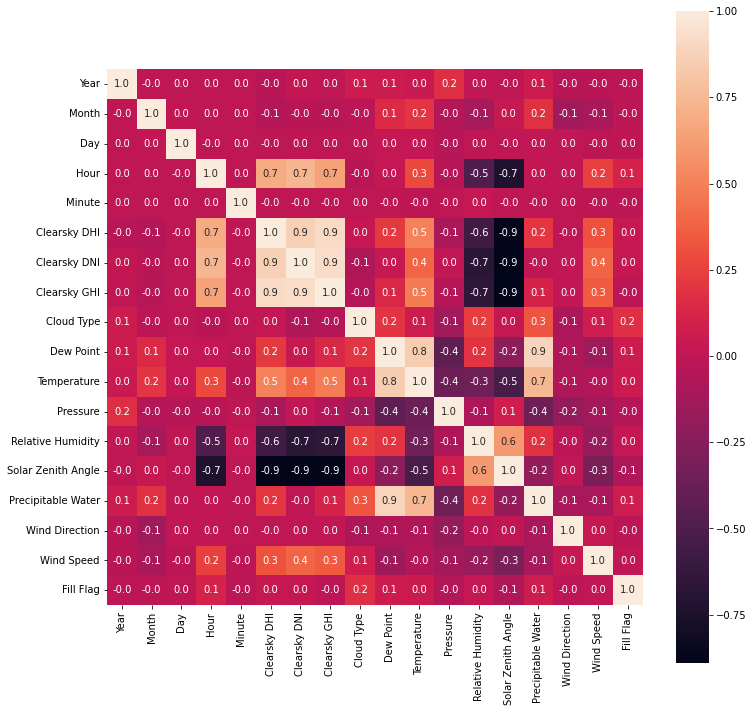

In [390]:
plt.figure(figsize = (12, 12))
sns.heatmap(train.corr(), square=True, annot=True, fmt=".1f")

In [472]:
train.groupby('Month')['Clearsky DNI'].mean()

Month
1     302.773253
2     316.718824
3     329.675538
4     353.801042
5     367.600403
6     361.719375
7     349.147849
8     337.050672
9     330.073889
10    329.955712
11    302.880000
12    279.091599
Name: Clearsky DNI, dtype: float64